In [1]:
!pip install nltk

In [2]:
import nltk

In [3]:
nltk.download('gutenberg')
nltk.download('maxent_treeback_pos_tagger')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Error loading maxent_treeback_pos_tagger: Package
[nltk_data]     'maxent_treeback_pos_tagger' not found in index


False

In [4]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [5]:
from nltk.corpus import gutenberg

In [6]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [134]:
corpus = gutenberg.open('austen-emma.txt').read()

In [76]:
tokens = sent_tokenize(corpus)

In [7]:
# 수많은 토크나이저가 있는데 꼭 추출
# 피처 후보가 될만한 애들을 찾아와야함.
#  : "토큰화"
# 음절(글자를 구성하는 spell)들/ 어절(띄어쓰기로 인해 구별되는 단어와 단어사이의 조합)이 조합되서 토큰화되는 2가지 방법이 있음
# 띄어쓰기는 음절사이의 조합이 필요함.

from nltk.tokenize import sent_tokenize

In [20]:
# 영어 외에 프랑스어, 등 다른언어써도됨. 한국어는 없음.

sent_tokenize(corpus)

['[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.',
 "She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.",
 'Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.',
 "Sixteen years had Miss Taylor been in Mr. Woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.",
 'Between _them_ it was more the intimacy\nof sisters.',
 "Even before Miss Taylor had ceased to hold the nominal

In [21]:
from nltk.tokenize import word_tokenize

In [22]:
wtokens = word_tokenize(tokens[0])

In [23]:
from nltk import regexp_tokenize

In [29]:
# 한글처리하고싶으면 여기에 한글(가-힣), 특정단어는 or연산자로 쭉 이어주면됨.

p = r"([a-zA-Z0-9]+)+"

In [129]:
retokens = [regexp_tokenize(token, p) for token in tokens]

In [130]:
retokens

[['Emma',
  'by',
  'Jane',
  'Austen',
  '1816',
  'VOLUME',
  'I',
  'CHAPTER',
  'I',
  'Emma',
  'Woodhouse',
  'handsome',
  'clever',
  'and',
  'rich',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her'],
 ['She',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  'indulgent',
  'father',
  'and',
  'had',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  's',
  'marriage',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period'],
 ['Her',
  'mother',
  'had',
  'died',
  'too',
  'long',
  'ago',
  'for',
  'her',
  'to',
  'have',
  'more',
  'than',


In [30]:
# 좀더 정교하게 정규식포함해서 실제로 순수하게 문자열들만 가져온것.
# 좀더더 정교하려면 후처리 필요. split처리해야함. '.'마침표있는거 없애줘야함.

In [126]:
text = nltk.Text(retokens)

In [127]:
# frequency를 담고있는 목록형 통계를 만들어줌.
# 단어의 빈도수를 알아야한다면, 이거 한두번만나온 feature는 쳐낼수도 있음.
# 한글토큰을 만들어서 똑같이 vocab()를 호출해주면 빈도수가 나올거임.

text.vocab()

FreqDist({'and': 3, 'Emma': 2, 'I': 2, 'with': 2, 'to': 2, 'of': 2, 'the': 2, 'by': 1, 'Jane': 1, 'Austen': 1, ...})

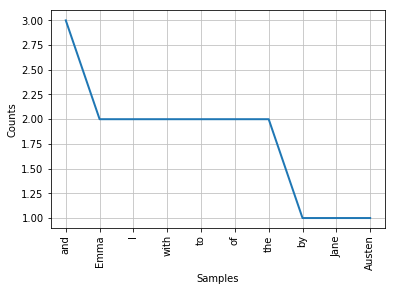

None


In [51]:
print(text.plot(10))

# 영어는 전치사, 관사, 소설같은 경우는 접속사가 반도가 높음.
# but, 결과적으로 얘들 다 없애야함. 불용어 처리하는거 뒤에서 할거임.
# 한국말도 분석해서 plot한 후 처리할거임.

In [37]:
from konlpy.tag import Kkma
from konlpy.corpus import kolaw

In [38]:
k = Kkma()

In [39]:
type(kolaw)

konlpy.corpus.CorpusLoader

In [40]:
corpus = kolaw.open(kolaw.fileids()[0]).read()

In [41]:
corpus

'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.\n\n       제1장 총강\n  제1조 ① 대한민국은 민주공화국이다.\n②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.\n  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.\n②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.\n  제3조 대한민국의 영토는 한반도와 그 부속도서로 한다.\n  제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 입각한 평화적 통일 정책을 수립하고 이를 추진한다.\n  제5조 ① 대한민국은 국제평화의 유지에 노력하고 침략적 전쟁을 부인한다.\n②국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며, 그 정치적 중립성은 준수된다.\n  제6조 ① 헌법에 의하여 체결·공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다.\n②외국인은 국제법과 조약이 정하는 바에 의하여 그 지위가 보장된다.\n  제7조 ① 공무원은 국민전체에 대한 봉사자이며, 국민에 대하여 책임을 진다.\n②공무원의 신분과 정치적 중립성은 법률이 정하는 바에 의하여 보장된다.\n  제8조 ① 정

In [43]:
# 가져온 헌법을 꼬마를 통해서 pos(전체 분석되는 태그까지 싹다 가져왔고.)
# morphs() : 형태소분석만가져오는애.
tokens = k.morphs(corpus)

In [44]:
len(tokens)

10053

In [52]:
# 필요없는 형태소는 없애고 명사 단위로 빈도수에 랭킹을 매겨가지고 볼 수 있음.
nouns = k.nouns(corpus)

In [46]:
ko = nltk.Text(tokens)

In [141]:
#ko.vocab() : 어떤단어가 몇번나왔는지.

sorted(ko.vocab(), reverse=True)

['히',
 '훈장',
 '훈련',
 '후임자',
 '후보자',
 '후',
 '효율적',
 '효력',
 '획정',
 '회의',
 '회부',
 '회복',
 '회기',
 '회계',
 '회',
 '활동',
 '환부',
 '환경권',
 '환경',
 '확정',
 '확인',
 '확보',
 '확립',
 '확고히',
 '혼인',
 '호선',
 '호',
 '형태',
 '형의',
 '형성',
 '형사',
 '형',
 '협박',
 '현행',
 '현재',
 '현역',
 '혁신',
 '헌법',
 '허가',
 '허',
 '향상',
 '행하',
 '행정부',
 '행정권',
 '행정',
 '행위시',
 '행위',
 '행사',
 '행복',
 '행동권',
 '행',
 '해하',
 '해제',
 '해임',
 '해산',
 '해당',
 '항해',
 '항의',
 '항구적',
 '항거',
 '항',
 '합리',
 '합동',
 '한하',
 '한반도',
 '한계',
 '한',
 '학문',
 '학교',
 '하의',
 '하여금',
 '하여',
 '하다',
 '하',
 '필요',
 '피해자',
 '피해',
 '피의자',
 '피고인',
 '피',
 '풍속',
 '품질',
 '표준',
 '표시',
 '표결',
 '표',
 '폭행',
 '포함',
 '포로',
 '포고',
 '폐회',
 '폐지',
 '폐습',
 '폐기',
 '평화적',
 '평화',
 '평생',
 '평등',
 '평가',
 '편성',
 '펴',
 '판사',
 '판결',
 '파면',
 '파견',
 '파',
 '특허',
 '특정',
 '특수',
 '특별',
 '특권',
 '투표자',
 '투표',
 '퇴직',
 '통할',
 '통하',
 '통지',
 '통제',
 '통일',
 '통신',
 '통수',
 '통상',
 '통고',
 '탄핵',
 '타파',
 '타인',
 '쾌적',
 '침해',
 '침략',
 '침',
 '친족',
 '취임',
 '취득',
 '출판',
 '출석',
 '추진',
 '추정',
 '추구',
 '추가',
 '추',
 '최초',
 '최종적',
 '최저

In [142]:
ko.vocab()

FreqDist({'의': 532, '하': 457, '.': 359, '에': 328, '는': 281, 'ㄴ다': 243, 'ㄴ': 234, '을': 232, '은': 195, '이': 192, ...})

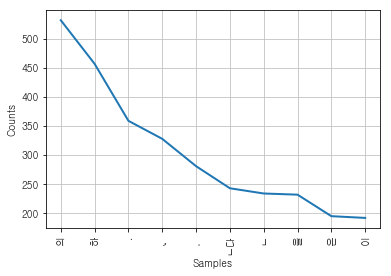

None


In [122]:
# nltk에선 한글폰트 지원안해주기때문에 그래프 그렸을때 다 깨짐...

print(ko.plot(10))

In [63]:
from matplotlib import font_manager, rc

In [103]:
font_list = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
font_list

['C:\\WINDOWS\\Fonts\\POORICH.TTF',
 'C:\\WINDOWS\\Fonts\\CASTELAR.TTF',
 'c:\\windows\\fonts\\lsans.ttf',
 'c:\\windows\\fonts\\gothicb.ttf',
 'c:\\windows\\fonts\\comicz.ttf',
 'C:\\WINDOWS\\Fonts\\BELL.TTF',
 'C:\\WINDOWS\\Fonts\\HYWULB.TTF',
 'c:\\windows\\fonts\\framdcn.ttf',
 'c:\\windows\\fonts\\cambriaz.ttf',
 'c:\\windows\\fonts\\enbodbi.ttf',
 'c:\\windows\\fonts\\hmkms.ttf',
 'C:\\WINDOWS\\Fonts\\BOOKOS.TTF',
 'C:\\WINDOWS\\Fonts\\CENSCBK.TTF',
 'c:\\windows\\fonts\\hatten.ttf',
 'c:\\windows\\fonts\\ocraext.ttf',
 'c:\\windows\\fonts\\georgiai.ttf',
 'c:\\windows\\fonts\\ravie.ttf',
 'C:\\WINDOWS\\Fonts\\HANSaleM.ttf',
 'c:\\windows\\fonts\\eraslght.ttf',
 'c:\\windows\\fonts\\jokerman.ttf',
 'C:\\WINDOWS\\Fonts\\BRADHITC.TTF',
 'c:\\windows\\fonts\\pertibd.ttf',
 'C:\\WINDOWS\\Fonts\\MATURASC.TTF',
 'C:\\WINDOWS\\Fonts\\FRABKIT.TTF',
 'C:\\WINDOWS\\Fonts\\LSANSD.TTF',
 'c:\\windows\\fonts\\ebrimabd.ttf',
 'C:\\WINDOWS\\Fonts\\HYBDAL.TTF',
 'C:\\WINDOWS\\Fonts\\ENCSCHBI.TTF

In [104]:
# Mac "/Library/Fonts/AppleGothic.ttf"
# Window "C:/windows/fonts/gulim.ttc"

font = font_manager.FontProperties(fname='C:\\WINDOWS\\Fonts\\NGULIM.TTF').get_name()

In [105]:
rc("font", family=font)

In [143]:
ko.count("대한민국")

11

In [139]:
# Emma는 몇번나왔는지
text.count("Emma")

855

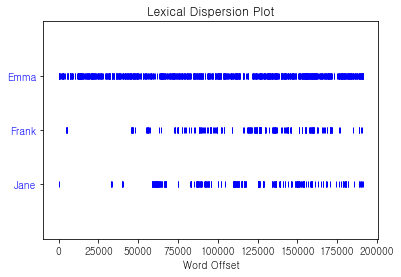

In [140]:
text.dispersion_plot(["Emma", "Frank", "Jane"])

# Emma 전문으로 그래프 Word Offset 찍어보기.

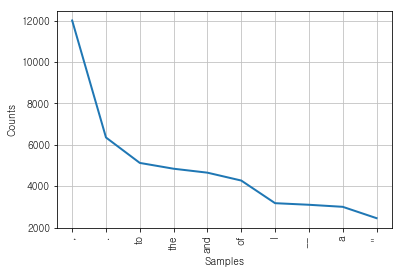

None


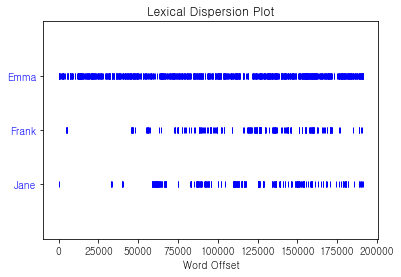

In [136]:
corpus = gutenberg.open('austen-emma.txt').read()
tokens = sent_tokenize(corpus)
retokens = word_tokenize(corpus)
# 전문가져오기.

p = r"([a-zA-Z0-9]+)+"
#retokens = regexp_tokenize(tokens, p)
text = nltk.Text(retokens)
print(text.plot(10))
text.dispersion_plot(["Emma", "Frank", "Jane"])

# 행정절차법 다가져오기

In [85]:
from konlpy.corpus import kobill

In [86]:
kobill.fileids()

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

In [87]:
kobillList = [kobill.open(i).read() for i in kobill.fileids()]

In [89]:
from konlpy.tag import Kkma

In [90]:
k = Kkma()

In [93]:
nouns = [k.nouns(i) for i in kobillList]

In [114]:
# 데이터셋 늘리기!!!!!!!!!!!!!!!!??????????????????????????/

koNouns = nltk.Text(nouns[0] + nouns[1] + nouns[2] + nouns[3] + nouns[4] + nouns[5] + nouns[6] + nouns[7])

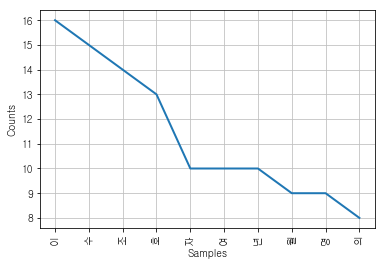

In [115]:
# 본인이라는 말보단 국민이라는 말이 많이나온댕.

koNouns.plot(10)

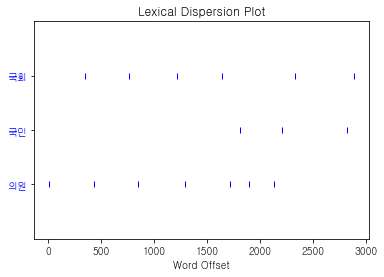

In [116]:
# 전체 단어가 전체 문서에서 어떤 위치에 나왔는지.
koNouns.dispersion_plot(["국회", "국민", "의원"])

In [117]:
koNouns.vocab()

FreqDist({'이': 16, '수': 15, '조': 14, '호': 13, '자': 10, '여': 10, '년': 10, '월': 9, '명': 9, '의': 8, ...})

In [123]:
koNouns.similar("국민")

# 왜 안나오지??????????????????????????
# 공개정보? 자연어처리에서의 용어.................
# 내가 찾고자 하는 정보와 이웃해있는, 가까이 있는, 함께 있는 정보를 찾을 수 있음.

In [137]:
text.similar("Emma")
# 여잔가부다...

she it he i weston you her harriet elton him me knightley jane that
and the all there they them


In [138]:
text.similar("Frank")

# 역시 여잔가부다...
# 문서에서 옆에 나온 단어를 가지고 통계를 내기때문에 성별/이혼/열애/ 등 기본적인 정보를
# 알 수도 있음.

her it you elton emma that weston them him harriet she he and all
hartfield highbury me mind knightley jane


# n-gram

In [144]:
# 여태까지 unigram형태로 했었음.
# 여러가지 n-gram형태로 만들수 있는 함수를 만들거임.

In [145]:
    # 가 나 다라 마 바 사
    # 가, 나, 다, 라, 마, 바, 사
    # n=2일때, 가나, 나다, 다라, 라마, 바사
    # n=3일땐, 가나다, 나다라, 다라마, 라마바, 마바사
    # 그리고 한 사람
    # 그리고한, 한사람(어절)
    # 이런식으로 붙여서 리턴을 할거임. collocation이라는 시뮬러를 뽑아낼 때 좋음.
    
    # 고_, _한, 한_, _사(음절)
    # bigram, trigram을 많이 쓰게 됨.
    # 한글자(길이 1개) 처리를 어떻게 해야할지 고민해야하다보면 쓰임.
    # 수사에도 한글자짜리가 있음. 1을 한글로 일, 한 이라고 쓸때도 있기때문에 중요함.
    # 어디를 띄어썼느냐에따라서 서로 다른 토큰이 되도록 하는것임.
    # 다른토큰으로 인식하고 각자 다른 토큰으로 카운팅 될 수 있도록.
    # 다음에 쓰게되면 그때가서 하는걸로..!


# Normalization

In [ ]:
# 구두점을 뺀 나머지 애들을 리턴함.
# 실습시간에 해보시길.(PPT. 108)
# 일반적인형태로는 패스워드는 대소문자 구분안함. 은행은 함.
# 정규화 하느라 그럼. 특수문자가 들어가는 순간 프로그램에서 해석해보릴수있기때문에, 없애려는 의도.
# 영어랑 관련된거라 안할거임. 실습시간에 해보시길.!



# Stop words(불용어 a, the)(구두점, 대소문자구분 후 남은 관사, 전치사)

In [146]:
# 한글가지고 해보죠 뭐.

# 미국 퀴즈쇼 중에 알파베사나씩 돌려서 전체를 맞추는 게임. 제일먼저 e를 말함.
# 제일 많이 나온걸 가지고 퀴즈를 맞추는것.
# 흔이 나오는 애들을 리스트로 뽑아서 없애줘야하는게 우리가 할 일.

# 불용어 리스틀 만들어서 이에 해당하면 걸리게 함.
# 하지만 사람들은 너무 똑똑해서 사이에 중간에 이상한 글자를 넣던가, 붙여쓰기를 함.
# 우리는 한글을 Konlpy를 써서 불용어를 제거할거임.

In [153]:
# 1) 사전만들기. 챗봇만들 때 하나의 덩어리로 만들고싶은 애를 써주면됨.
#  ex) 여기에 단어 쭉써주면 앞으로 이런애들은 장소로 인식하게 함.
# 우리는 여기서 불용어로 인식하게 할거임.
# 품사까지 써줫음.
# 새로나온 신조어는 품사가 없을테니. 지금은 그냥 일반적으로 단어만써준형태로 만들거임.

#stopwords = [("시발", "NNG"), "씨발"]
stopwords = ["시발", "씨발"]

In [160]:
rowString = "시발 련아 ^^"
Kkma().morphs(rowString)

['시발', '련아', '^^']

In [159]:
# 1차 쉬운방법. 욕만 추출하려고 1차 형태소 분석.

for src in Kkma().morphs(rowString):
    if src not in stopwords:
        print(src)

련아
^^


In [167]:
# 2차 bigram사용.

rowString= "시발련아^^"

for src in Kkma().morphs(rowString):
    isStop = False
    for temp in bigram(src):
        if temp in stopwords:
            isStop = True
        
    if not isStop:
        print(src)
# 형태소 분석 결과는 3음절짜리고
# 사전에 들어간것도 2음절짜리이기때문에 걸러낼 수 없음.
# 하지만 bigram을 썼기때문에 걸러짐..!

아
^^


In [164]:
# 2음절로 거르는 게 필요???????
# 암튼 아까 하다만 ngram쓸거임.
bigram("가나다라")
# 두글자씩 잘라서 나오는 bigram.

['가나', '나다', '다라', '라']

In [163]:
def bigram(tokens, n=2):
    result = []
    
    for i in range(len(tokens)):
        result.append(tokens[i:i+n])
    
    return result

In [169]:
# 3차 정규식방법
rowString = "시-발련아^^ 시1발련아^^ 시!발련아^^"

# 형태소 분석 결과.
Kkma().morphs(rowString)

['시',
 '-',
 '발련',
 '아',
 '^^',
 '시',
 '1',
 '발',
 '련아',
 '^^',
 '시',
 '!',
 '발련',
 '아',
 '^^']

In [173]:
import re

# 형태소 분석 안쓰고 자를거임.
rowString = "시-발련아^^ 시1발련아^^ 시!발련아^^ 시~!대1ㅕ새34ㅑㅓㅎ@@$발련아^^"

for src in rowString.split():
    print(src)
    src = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣]", "", src)
    # 1번인자에 해당하면 2번인자로 바꿔버림.
    print(src+"\n")
    
# 이메일가지고 걸러낼 때 스팸으로 처리해서 필터링하라고. 할수도 있을거임.
# ㅎㅅ$$ 가입고객 전원증정 등.. 필터링해서 막아버릴 수 있을거임.

시-발련아^^
시발련아

시1발련아^^
시발련아

시!발련아^^
시발련아

시~!대1ㅕ새34ㅑㅓㅎ@@$발련아^^
시대ㅕ새ㅑㅓㅎ발련아



In [ ]:
# 경제면에서,
# 특정카테고리에 있는 많이나오는 키워드가 있음.
# 명사만 가지고도 대충 앎.
# 그래프도 그려보고 similar도 뽑아보고.
# 내가 걸러내야 할 단어들 걸러내기.